In [1]:
import numpy as np 

In [29]:
n = 10
np.random.seed(0)
prob = np.random.random(n)

In [30]:
def action(k):
    assert 0 <= k < n
    if np.random.random() < prob[k]:
        return 1
    return 0 

In [48]:
# Greedy Epsilon
def play(eps = 0.2, steps = 1000):
    record = np.zeros((n,2))
    history = []
    avg = 0
    for step in range(steps):
        if np.random.random() < eps: # explore  
            k = np.random.randint(0,n)
        else: # exploit
            k = np.argmax(record[:,0])

        # try
        result = action(k)

        # update
        record[k,0] = (record[k,0] * record[k,1] + result) / (1 + record[k,1])
        record[k,1] += 1
        
        avg = (avg * step + result) / (1 + step)
        history.append(avg)

    return history , record

In [62]:
history1 , record1 = play()

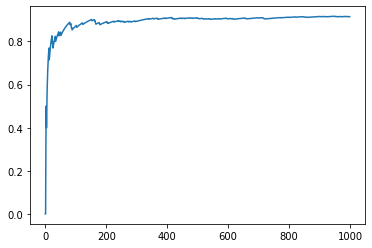

In [60]:
import matplotlib.pyplot as plt
plt.plot(history1)

<BarContainer object of 10 artists>

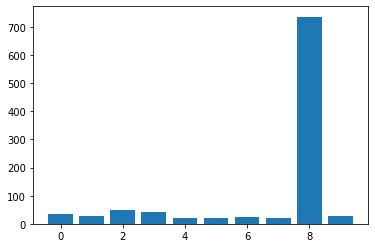

In [63]:
plt.bar(np.arange(n),record1[:,1])

In [64]:
# Softmax
def play2(steps = 1000):
    record = np.zeros((n,2))
    history = []
    avg = 0
    for step in range(steps):
        softmax = np.exp(record[:,0])
        softmax *= 1. / np.sum(softmax)
        k = np.random.choice(np.arange(n),softmax)

        # try
        result = action(k)

        # update
        record[k,0] = (record[k,0] * record[k,1] + result) / (1 + record[k,1])
        record[k,1] += 1
        
        avg = (avg * step + result) / (1 + step)
        history.append(avg)

    return history , record

In [78]:
history2 , record2 = play()

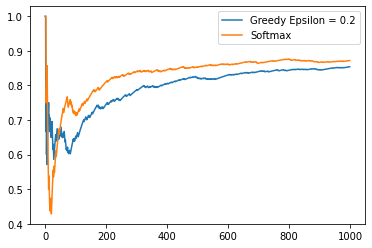

In [79]:
plt.plot(history1)
plt.plot(history2)
plt.legend(['Greedy Epsilon = 0.2','Softmax'])

<BarContainer object of 10 artists>

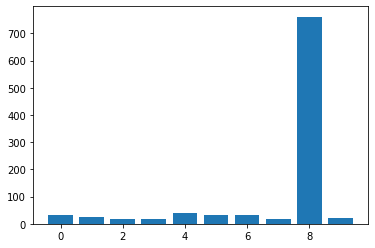

In [77]:
plt.bar(np.arange(n),record2[:,1])